[View in Colaboratory](https://colab.research.google.com/github/meaninginuse/work/blob/master/Portfolio%20Optimization_FANG_COV%20Problemsv2.ipynb)

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
#pyplot had to be imported

In [0]:
!pip install -q pandas_datareader
import pandas_datareader as web
#install package each time - can't call pandas directly

In [0]:
symbols = ['FB', 'AAPL', 'NFLX', 'GOOG']
noa = len(symbols)
# this is a list that will then be looped for a dataframe

In [112]:
type(noa)

int

In [0]:
start = datetime.datetime(2018, 9, 2)
#datetime for pulling quotes

In [0]:
end = datetime.datetime(2018, 10, 3)

In [8]:
f = web.DataReader('GOOG', 'iex', start, end)
f.head(1)
#check if the Datareader is working

,open,high,low,close,volume
date,,,,,
2018-09-04,1204.27,1212.99,1192.5,1197.0,1831045


In [9]:
data = pd.DataFrame()
for sym in symbols:
 data[sym] = web.DataReader(sym, data_source='iex', start=start, end=end)['close']
data.columns = symbols
#loop that creates a dataframe
data.head(1)

,FB,AAPL,NFLX,GOOG
date,,,,
2018-09-04,171.16,228.36,363.6,1197.0


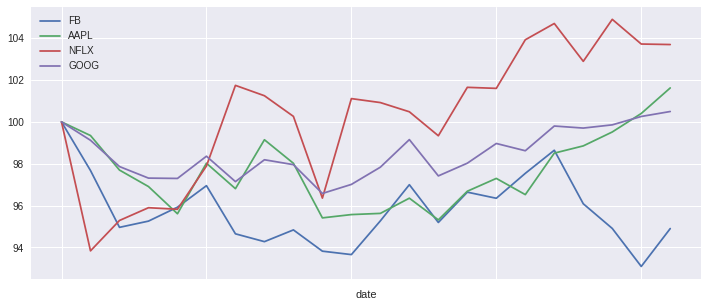

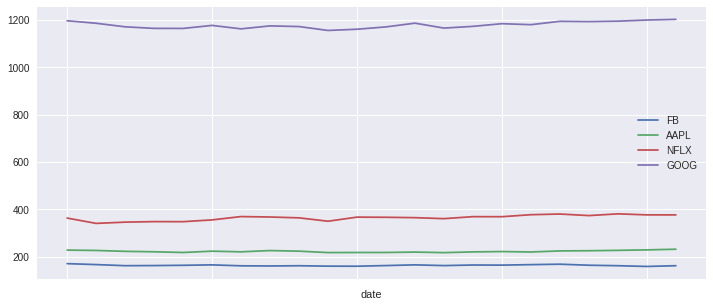

In [10]:
(data / data.iloc[0] * 100).plot(figsize=(12, 5))
(data).plot(figsize=(12, 5))
#ix is depreciated, replaced by iloc
#this normals the data to a zero base


In [11]:
rets = np.log(data / data.shift(1))
#new column for returns based on position above
#this uses log returns
rets.info()
#info show that the dataframe is empty for the first column, there's no shift down
rets.head(1)


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 2018-09-04 to 2018-10-03
Data columns (total 4 columns):
FB      21 non-null float64
AAPL    21 non-null float64
NFLX    21 non-null float64
GOOG    21 non-null float64
dtypes: float64(4)
memory usage: 880.0+ bytes


,FB,AAPL,NFLX,GOOG
date,,,,
2018-09-04,NaN,NaN,NaN,NaN


In [12]:
rets.head(2)
#check for log returns 
#for NFLX the simple return 0.012165
#log returns are lower when positive and higher when negative (until infinite)
#they're also symmetrical

,FB,AAPL,NFLX,GOOG
date,,,,
2018-09-04,NaN,NaN,NaN,NaN
2018-09-05,-0.023528,-0.006546,-0.063644,-0.008827


In [13]:
data.head(2)

,FB,AAPL,NFLX,GOOG
date,,,,
2018-09-04,171.16,228.36,363.60,1197.00
2018-09-05,167.18,226.87,341.18,1186.48


In [14]:
rets['NFLX']

date
2018-09-04         NaN
2018-09-05   -0.063644
2018-09-06    0.015357
2018-09-07    0.006387
2018-09-10   -0.000775
2018-09-11    0.021354
2018-09-12    0.038634
2018-09-13   -0.004877
2018-09-14   -0.009799
2018-09-17   -0.039758
2018-09-18    0.048199
2018-09-19   -0.001879
2018-09-20   -0.004370
2018-09-21   -0.011479
2018-09-24    0.023044
2018-09-25   -0.000487
2018-09-26    0.022615
2018-09-27    0.007461
2018-09-28   -0.017435
2018-10-01    0.019324
2018-10-02   -0.011311
2018-10-03   -0.000239
Name: NFLX, dtype: float64

In [15]:
rets.mean() * 252
#simple arithmetic mean 

FB     -0.628220
AAPL    0.193389
NFLX    0.435881
GOOG    0.059501
dtype: float64

In [109]:
rets.cov()*252
#covariance happens on the daily
#there are copies of figures AAPL & NFLX = NFLX & AAPL

,FB,AAPL,NFLX,GOOG
FB,0.065649,0.022726,0.025507,0.024086
AAPL,0.022726,0.049753,0.020677,0.027756
NFLX,0.025507,0.020677,0.154922,0.013856
GOOG,0.024086,0.027756,0.013856,0.022136


In [170]:
weights = np.random.random(noa)
weights /= np.sum(weights)
#new numpy array of 4 random number that add up to 1
#second line assures weight are equal to 1
weights

array([0.38589276, 0.10125468, 0.10440398, 0.40844858])

In [0]:
test = np.sum(rets.mean() * weights) * 252

In [172]:
print(test)

-0.15303298261181092


In [0]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))


0.05746968094588763

In [74]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))


0.21684955363394043

In [0]:
prets = []
pvols = []
for p in range (2500):
 weights = np.random.random(noa)
 weights /= np.sum(weights)
 prets.append(np.sum(rets.mean() * weights) * 252)
 pvols.append(np.sqrt(np.dot(weights.T,
 np.dot(rets.cov() * 252, weights))))
  
prets = np.array(prets)
pvols = np.array(pvols)



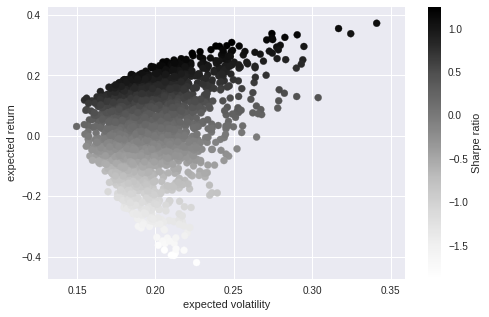

In [76]:
plt.figure(figsize=(8, 5))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [0]:
palt?

In [0]:
x = np.array([[-1,-1], [1,1],]).T

In [107]:
np.cov(x)
#think about deviations from the mean, eg 2 data with identical values will have covariance of 0
#the size of matrix will lead to the number of covariances, eg. 2 will be 4, 4 will be 16
#correlation is scaled covariance

array([[2., 2.],
       [2., 2.]])

In [40]:
rets.shape()

TypeError: ignored

In [0]:
x/